In [13]:
!pip3 install git+git://github.com/Ayesha279/benchmark-comparison.git/tree/multiRecord_touchstone
from touchstone import __version__
from touchstone.benchmarks.generic import Benchmark
from touchstone import decision_maker
from touchstone import databases
from touchstone.utils.lib import mergedicts, flatten_and_discard
from touchstone.utils.lib import mergedicts, flatten_and_discard
from tabulate import tabulate
import pandas as pd
import matplotlib.pyplot as plt

compute_header = []
uuid="aeed6306-b7e1-11eb-b313-e86a640406b2"
database="elasticsearch"
es_url="https://search-perfscale-dev-chmf5l4sh66lvxbnadi4bznl3a.us-west-2.es.amazonaws.com"
benchmark=Benchmark(open("config.json"), database)
main = {}

for compute in benchmark.compute_map['ocm-requests'] :
    conn=databases.grab(database,es_url)
    result=conn.emit_compute_dict(uuid,
                                  compute,
                                  "ocm-requests",
                                  "uuid")
    mergedicts(result,main)

  Cloning git://github.com/Ayesha279/benchmark-comparison.git/tree/multiRecord_touchstone to /tmp/pip-req-build-c8tu8psi
  Running command git clone -q git://github.com/Ayesha279/benchmark-comparison.git/tree/multiRecord_touchstone /tmp/pip-req-build-c8tu8psi
  fatal: remote error:
    Ayesha279/benchmark-comparison.git/tree/multiRecord_touchstone is not a valid repository name
    Visit https://support.github.com/ for help
ERROR: Command errored out with exit status 128: git clone -q git://github.com/Ayesha279/benchmark-comparison.git/tree/multiRecord_touchstone /tmp/pip-req-build-c8tu8psi Check the logs for full command output.


In [14]:
for key in compute.get("filter", []):
        compute_header.append(key.split(".keyword")[0])
for bucket in compute.get("buckets", []):
        compute_header.append(bucket.split(".keyword")[0])
for extra_h in ["key", 'uuid', "value"]:
        compute_header.append(extra_h)
        row_list = []
flatten_and_discard(main, compute_header, row_list)
print(
    tabulate(row_list, headers=compute_header, tablefmt="pretty")
)

+------+----------+-----------+-----------------+--------------------------------------+--------------------+
| code | bytes_in | bytes_out |       key       |                 uuid                 |       value        |
+------+----------+-----------+-----------------+--------------------------------------+--------------------+
|  0   |    0     |     0     | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 14116161772.285223 |
| 500  |   151    |    332    | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 12010500769.847424 |
| 500  |   151    |    331    | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 19069232539.04286  |
| 500  |   151    |    330    | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 17562597556.934425 |
| 500  |   151    |    329    | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 | 23259229767.333332 |
| 500  |   355    |    263    | avg(latency_ns) | aeed6306-b7e1-11eb-b313-e86a640406b2 |  781199137.28125   |
| 500  |  

In [11]:
df1 =pd.DataFrame.from_records(
    [
        (level1, level2, level3, level4, level5, level6, level7, level8, leaf)
        for level1, level2_dict in result.items()
        for level2, level3_dict in level2_dict.items()
        for level3, level4_dict in level3_dict.items()
        for level4, level5_dict in level4_dict.items()
        for level5, level6_dict in level5_dict.items()
        for level6, level7_dict in level6_dict.items()
        for level7, level8_dict in level7_dict.items()
        for level8, leaf in level8_dict.items()
    ],
    columns=['type1', 'code', 'type2', 'Bytes_in', 'type3','Bytes_out', 'KEY', 'UUID', 'VALUE']
)
df1 =df1.drop(columns=['type1', 'type2', 'type3'])
df1.insert(0, 'New_ID', range(1, 1 + len(df1)))
print(df1)

    New_ID  code  Bytes_in  Bytes_out              KEY  \
0        1     0         0          0  max(latency_ns)   
1        2     0         0          0  avg(latency_ns)   
2        3   500       151        332  max(latency_ns)   
3        4   500       151        332  avg(latency_ns)   
4        5   500       151        331  max(latency_ns)   
5        6   500       151        331  avg(latency_ns)   
6        7   500       151        330  max(latency_ns)   
7        8   500       151        330  avg(latency_ns)   
8        9   500       151        329  max(latency_ns)   
9       10   500       151        329  avg(latency_ns)   
10      11   500       355        263  max(latency_ns)   
11      12   500       355        263  avg(latency_ns)   
12      13   500       345        263  max(latency_ns)   
13      14   500       345        263  avg(latency_ns)   
14      15   500       352        263  max(latency_ns)   
15      16   500       352        263  avg(latency_ns)   
16      17   5

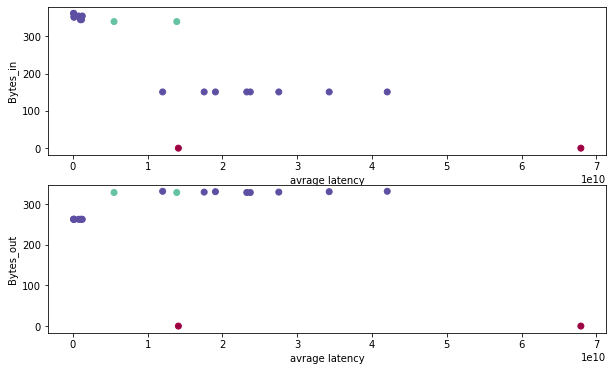

In [12]:
fig, ax = plt.subplots(2, figsize=(10, 6))
ax[0].scatter(x = df1['VALUE'], y = df1['Bytes_in'], c = df1['code'], cmap='Spectral')
ax[0].set_xlabel("avrage latency")
ax[0].set_ylabel("Bytes_in")

ax[1].scatter(x = df1['VALUE'], y = df1['Bytes_out'], c = df1['code'], cmap='Spectral')
ax[1].set_xlabel("avrage latency")
ax[1].set_ylabel("Bytes_out")


plt.show()